$$Diego \space Castillo \space Reyes$$

<h1 align="center">Algoritmo de Deutsch pennylane</h1>
Crear el algoritmo de Deutsch con matriz de densidad en pennylane

In [123]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [124]:
# define the quantum device
dev = qml.device("default.qubit", wires=2, shots=1)

In [125]:
# define constant function
def constant(x):
    # f(x): {0, 1} -> {0, 1}
    if x == 0:
        return 0
    if x == 1:
        return 0

#define balanced function
def balanced(x):
    # f(x): {0, 1} -> {1, 0}
    if x == 0:
        return 1
    if x == 1:
        return 0

In [126]:
# define de oracle 
def U(f):
    u = np.array([
        [1-f(0), f(0), 0, 0],
        [f(0), 1-f(0), 0, 0],
        [0, 0, 1-f(1), f(1)],
        [0, 0, f(1), 1-f(1)]
    ])
    return u

In [127]:
# U_f = U(constant)
list = [U(constant), U(balanced)]
U_f = list[np.random.randint(0, 2)]

# define the quantum circuit
@qml.qnode(dev)
def circuit():
    qml.PauliX(1)
    qml.Hadamard(0)
    qml.Hadamard(1)
    qml.QubitUnitary(U_f, wires=[0, 1]) # oracle
    qml.Hadamard(0)
    return qml.sample(wires=0)

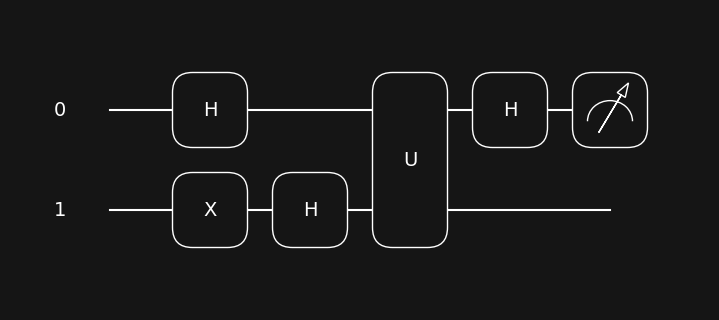

In [128]:
# Draw the circuit using matplotlib
qml.drawer.use_style("black_white_dark")
fig, ax = qml.draw_mpl(circuit)()
plt.show()

In [129]:
# Run the circuit and get the result
result = circuit()
print(f"Resultado de la medicion: {result}")

print(f"La funcion es {'constante' if np.array_equal(U_f, U(constant)) else 'balanceada'}")

Resultado de la medicion: 0
La funcion es constante
